In [1]:
from tensorflow import keras
from keras import models 
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import tensorflow as tf

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train.reshape((60000, 28, 28, 1))
X_train = X_train/255

X_test = X_test.reshape((10000, 28, 28, 1))
X_test = X_test/255

y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [3]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='nadam',metrics=['accuracy'])

In [7]:
a=model.fit(X_train,y_train,batch_size=64,epochs=10,validation_split=0.167)

Epoch 1/10
781/781 [==============================] - 30s 38ms/step - loss: 0.1420 - accuracy: 0.9477 - val_loss: 0.1483 - val_accuracy: 0.9442
Epoch 2/10
781/781 [==============================] - 30s 38ms/step - loss: 0.1314 - accuracy: 0.9528 - val_loss: 0.1461 - val_accuracy: 0.9491
Epoch 3/10
781/781 [==============================] - 30s 39ms/step - loss: 0.1194 - accuracy: 0.9562 - val_loss: 0.1745 - val_accuracy: 0.9363
Epoch 4/10
781/781 [==============================] - 30s 38ms/step - loss: 0.1093 - accuracy: 0.9600 - val_loss: 0.1623 - val_accuracy: 0.9395
Epoch 5/10
781/781 [==============================] - 30s 38ms/step - loss: 0.1006 - accuracy: 0.9631 - val_loss: 0.1729 - val_accuracy: 0.9356
Epoch 6/10
781/781 [==============================] - 30s 38ms/step - loss: 0.0924 - accuracy: 0.9661 - val_loss: 0.1935 - val_accuracy: 0.9310
Epoch 7/10
781/781 [==============================] - 30s 38ms/step - loss: 0.0833 - accuracy: 0.9697 - val_loss: 0.1680 - val_accuracy:

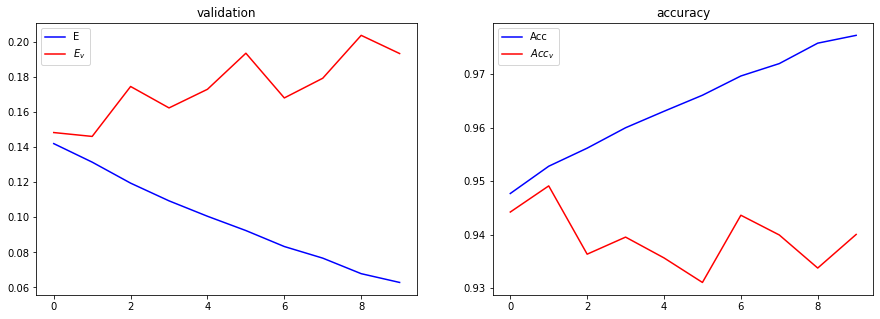

In [9]:
data_dict = a.history
loss = data_dict['loss']
data_loss = data_dict['val_loss']
acc = data_dict['accuracy']
val_acc = data_dict['val_accuracy']

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(loss,'b-',label='E')
plt.plot(data_loss,'r-',label='$E_v$')
plt.title('validation')
plt.legend()

plt.subplot(122)
plt.plot(acc,'b-',label='Acc')
plt.plot(val_acc,'r-',label='$Acc_v$')
plt.title('accuracy')
plt.legend()

In [10]:
test_loss, test_acc = model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.3275 - accuracy: 0.9154


dropout없이 검증 후 피팅 결과, 91.5%가 나왔으며 MLP의 정확도보다 높다. 하지만 검증 그래프를 참고하면 신뢰도가 떨어지는 결과값이다.

In [6]:
model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
model3.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model3.add(tf.keras.layers.Dropout(0.3))
model3.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model3.add(tf.keras.layers.Dropout(0.3))
model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(256, activation='relu'))
model3.add(tf.keras.layers.Dropout(0.5))
model3.add(tf.keras.layers.Dense(10, activation='softmax'))
model3.compile(loss='categorical_crossentropy',optimizer='nadam',metrics=['accuracy'])

In [7]:
c=model3.fit(X_train,y_train,batch_size=64,epochs=10,validation_split=0.167)

Epoch 1/10
781/781 [==============================] - 42s 54ms/step - loss: 0.5633 - accuracy: 0.7938 - val_loss: 0.4098 - val_accuracy: 0.8624
Epoch 2/10
781/781 [==============================] - 42s 54ms/step - loss: 0.3968 - accuracy: 0.8582 - val_loss: 0.3495 - val_accuracy: 0.8780
Epoch 3/10
781/781 [==============================] - 42s 54ms/step - loss: 0.3609 - accuracy: 0.8682 - val_loss: 0.3267 - val_accuracy: 0.8874
Epoch 4/10
781/781 [==============================] - 42s 54ms/step - loss: 0.3376 - accuracy: 0.8772 - val_loss: 0.3068 - val_accuracy: 0.8942
Epoch 5/10
781/781 [==============================] - 42s 54ms/step - loss: 0.3252 - accuracy: 0.8825 - val_loss: 0.3068 - val_accuracy: 0.8880
Epoch 6/10
781/781 [==============================] - 42s 54ms/step - loss: 0.3120 - accuracy: 0.8854 - val_loss: 0.2908 - val_accuracy: 0.8994
Epoch 7/10
781/781 [==============================] - 42s 54ms/step - loss: 0.3025 - accuracy: 0.8902 - val_loss: 0.2927 - val_accuracy:

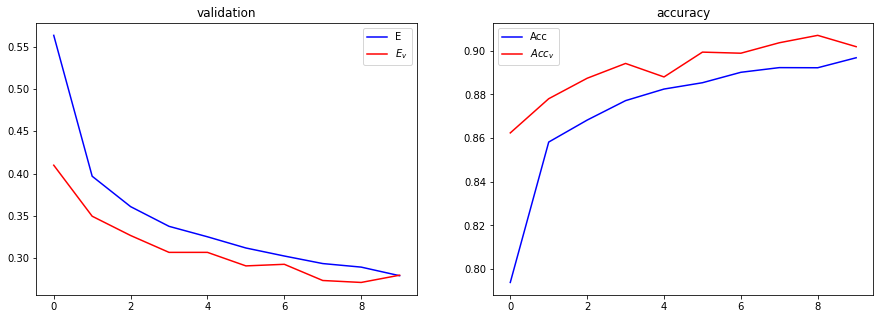

In [8]:
data_dict = c.history
loss = data_dict['loss']
data_loss = data_dict['val_loss']
acc = data_dict['accuracy']
val_acc = data_dict['val_accuracy']

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(loss,'b-',label='E')
plt.plot(data_loss,'r-',label='$E_v$')
plt.title('validation')
plt.legend()

plt.subplot(122)
plt.plot(acc,'b-',label='Acc')
plt.plot(val_acc,'r-',label='$Acc_v$')
plt.title('accuracy')
plt.legend()

In [9]:
test_loss, test_acc = model3.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2899 - accuracy: 0.8961


5:1로 검증 데이터 분리 후 dropout 결과, 89.6%가 나왔으며 MLP의 정확도보다 높다. 검증, dropout을 거치지 않은 데이터 보다는 정확도가 낮지만, 그래프를 통해 E와 E_v 데이터의 차이를 비교해보면 검증과 dropout을 거친 데이터의 정확도가 더욱 신뢰도가 높다.

fashion mnist데이터를 MLP와 CNN 방법으로 분류한 결과를 비교하면 87.9%와 89.6%로 CNN의 정확도가 더 높다. 더구나 검증 데이터의 그래프를 참고하면 MLP를 이용한 분류는 CNN보다 오차가 큰 것을 알 수 있다. 따라서 fashion mnist데이터를 분류하는 것은 CNN 방법이 더욱 정확함을 알 수 있다.